## Etapa 1 - Instalação de Bibliotecas necessárias

In [1]:
%pip install pandas
%pip install matplotlib.pyplot
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Etapa 2 - Leitura do DataFrame

In [3]:
df = pd.read_csv(
    'Mestrado_UFABC/BaseG - Graduação/BaseG (1)/BaseG/BaseG---Atuacoes-conselhos-comissoes.csv',
    delimiter='\t',
    engine='python',
    on_bad_lines='skip',
    encoding='utf-8'
)
df

,ID-Lattes,Nome,Instituição,Período,Mês-Inicio,Ano-Inicio,Mês-Fim,Ano-Fim,Orgão,Unidade,Especificação
0,'9999283062137312,João Victor Xavier Oliveira,Centro Universitário Estácio Juiz de Fora,ATUAL,1.0,2024,NaN,NaN,Centro Universitário Estácio Juiz de Fora,NaN,Atuo na Equipe de Comunicação do Centro Univer...
1,'9999083750118384,Nelson Alejandro Herrera Gomez,ATISAE,ANTERIOR,5.0,2006,7.0,2006.0,ATISAE,NaN,Capacitaçao em Metrologia Industrial
2,'9996042179052047,Hadassa Barros de Pieri,Universidade de São Paulo,ANTERIOR,12.0,2022,12.0,2023.0,Faculdade de Odontologia da USP,NaN,Suplente do cargo de Representante Discente do...
3,'9996042179052047,Hadassa Barros de Pieri,Universidade de São Paulo,ANTERIOR,12.0,2021,12.0,2022.0,Faculdade de Odontologia da USP,NaN,Representante discente titular da Comissão de ...
4,'9995648841514038,Ademir Gautério Troina Júnior,"Instituto Federal de Educação, Ciência e Tecno...",ATUAL,9.0,2014,NaN,NaN,IFRS - Campus Porto Alegre,NaN,Presidência da Comissão Especial de Licitação ...
...,...,...,...,...,...,...,...,...,...,...,...
42010,'0002301188060663,Agatha Bacelar Rabelo,Prefeitura Municipal de Conceicao do Mato Dentro,ANTERIOR,2.0,2021,6.0,2022.0,Secretaria Municipal de Cultura e Patrimônio H...,NaN,Conselheira Titular do Conselho Municipal de E...
42011,'0002301188060663,Agatha Bacelar Rabelo,Associação dos Condutores do Patrimônio Cultural,ATUAL,7.0,2022,NaN,NaN,Associação dos Condutores do Patrimônio Cultural,NaN,Consultora em Patrimônio Cultural
42012,'0002240553309252,Robson Melchiades Neto Junior,Centro Universitário Sagrado Coração,ANTERIOR,1.0,2020,4.0,2022.0,Centro de Ciências Exatas e Naturais,NaN,Representante Discente
42013,'0002068151135697,Jeanne Alves Vilela,Universidade de São Paulo,ANTERIOR,10.0,2018,10.0,2019.0,Instituto de Arquitetura e Urbanismo da USP/Sã...,NaN,Representante discente suplente na Comissão de...


## Etapa 3 – Visualização geral do DataFrame

In [4]:
df.columns


Index(['ID-Lattes', 'Nome', 'Instituição', 'Período', 'Mês-Inicio',
       'Ano-Inicio', 'Mês-Fim', 'Ano-Fim', 'Orgão', 'Unidade',
       'Especificação'],
      dtype='object')

In [5]:
df.dtypes

ID-Lattes         object
Nome              object
Instituição       object
Período           object
Mês-Inicio       float64
Ano-Inicio         int64
Mês-Fim          float64
Ano-Fim          float64
Orgão             object
Unidade           object
Especificação     object
dtype: object

In [6]:
df.shape

(42015, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42015 entries, 0 to 42014
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID-Lattes      42015 non-null  object 
 1   Nome           42015 non-null  object 
 2   Instituição    42010 non-null  object 
 3   Período        42015 non-null  object 
 4   Mês-Inicio     38526 non-null  float64
 5   Ano-Inicio     42015 non-null  int64  
 6   Mês-Fim        28573 non-null  float64
 7   Ano-Fim        31271 non-null  float64
 8   Orgão          40188 non-null  object 
 9   Unidade        7057 non-null   object 
 10  Especificação  42015 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 3.5+ MB


## Etapa 4 – Verificação de dados ausentes/duplicados & tratamento

In [8]:
missing_count_per_column = df.isnull().sum()

In [9]:
missing_percentage_per_column = df.isnull().mean() * 100
missing_percentage_per_column = missing_percentage_per_column.sort_values(ascending=False)


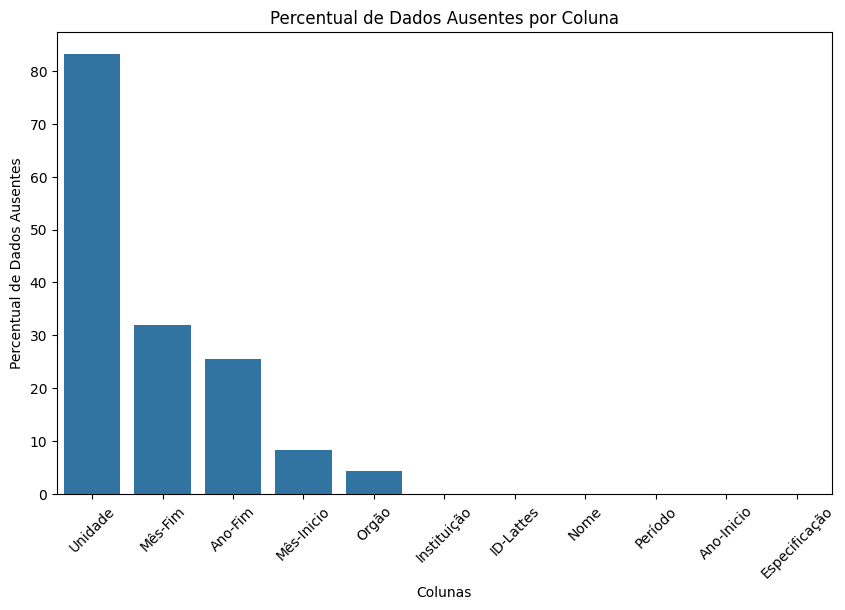

In [10]:

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage_per_column.index, y=missing_percentage_per_column.values)
plt.xticks(rotation=45)
plt.xlabel('Colunas')
plt.ylabel('Percentual de Dados Ausentes')
plt.title('Percentual de Dados Ausentes por Coluna')
plt.show()

In [11]:
missing_stats = df.isnull().agg(['sum', 'mean'])
missing_stats

,ID-Lattes,Nome,Instituição,Período,Mês-Inicio,Ano-Inicio,Mês-Fim,Ano-Fim,Orgão,Unidade,Especificação
sum,0.0,0.0,5.000000,0.0,3489.000000,0.0,13442.000000,10744.000000,1827.000000,34958.000000,0.0
mean,0.0,0.0,0.000119,0.0,0.083042,0.0,0.319933,0.255718,0.043484,0.832036,0.0


In [12]:
lista_orgao = df['Orgão'].value_counts().reset_index()
lista_orgao.columns = ['Orgão', 'contagem']



In [13]:
lista_orgao.head(50)

,Orgão,contagem
0,Reitoria,1018
1,Conselho Universitário,455
2,Faculdade de Medicina,328
3,UNIVERSIDADE FEDERAL DE SANTA CATARINA - UFSC,302
4,Faculdade de Medicina de Botucatu,275
5,Centro de Ciências da Saúde,199
6,"Conselho de Ensino, Pesquisa e Extensão",134
7,Faculdade de Medicina do ABC,129
8,Faculdade de Direito,123
9,Faculdade de Ciências de Bauru,119


In [14]:
df['Mês-Inicio'] = df['Mês-Inicio'].astype('Int64')
df['Ano-Inicio'] = df['Ano-Inicio'].astype('Int64') 
df['Mês-Fim'] = df['Mês-Fim'].astype('Int64')
df['Mês-Fim'] = df['Mês-Fim'].fillna(0)

df

,ID-Lattes,Nome,Instituição,Período,Mês-Inicio,Ano-Inicio,Mês-Fim,Ano-Fim,Orgão,Unidade,Especificação
0,'9999283062137312,João Victor Xavier Oliveira,Centro Universitário Estácio Juiz de Fora,ATUAL,1,2024,0,NaN,Centro Universitário Estácio Juiz de Fora,NaN,Atuo na Equipe de Comunicação do Centro Univer...
1,'9999083750118384,Nelson Alejandro Herrera Gomez,ATISAE,ANTERIOR,5,2006,7,2006.0,ATISAE,NaN,Capacitaçao em Metrologia Industrial
2,'9996042179052047,Hadassa Barros de Pieri,Universidade de São Paulo,ANTERIOR,12,2022,12,2023.0,Faculdade de Odontologia da USP,NaN,Suplente do cargo de Representante Discente do...
3,'9996042179052047,Hadassa Barros de Pieri,Universidade de São Paulo,ANTERIOR,12,2021,12,2022.0,Faculdade de Odontologia da USP,NaN,Representante discente titular da Comissão de ...
4,'9995648841514038,Ademir Gautério Troina Júnior,"Instituto Federal de Educação, Ciência e Tecno...",ATUAL,9,2014,0,NaN,IFRS - Campus Porto Alegre,NaN,Presidência da Comissão Especial de Licitação ...
...,...,...,...,...,...,...,...,...,...,...,...
42010,'0002301188060663,Agatha Bacelar Rabelo,Prefeitura Municipal de Conceicao do Mato Dentro,ANTERIOR,2,2021,6,2022.0,Secretaria Municipal de Cultura e Patrimônio H...,NaN,Conselheira Titular do Conselho Municipal de E...
42011,'0002301188060663,Agatha Bacelar Rabelo,Associação dos Condutores do Patrimônio Cultural,ATUAL,7,2022,0,NaN,Associação dos Condutores do Patrimônio Cultural,NaN,Consultora em Patrimônio Cultural
42012,'0002240553309252,Robson Melchiades Neto Junior,Centro Universitário Sagrado Coração,ANTERIOR,1,2020,4,2022.0,Centro de Ciências Exatas e Naturais,NaN,Representante Discente
42013,'0002068151135697,Jeanne Alves Vilela,Universidade de São Paulo,ANTERIOR,10,2018,10,2019.0,Instituto de Arquitetura e Urbanismo da USP/Sã...,NaN,Representante discente suplente na Comissão de...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42015 entries, 0 to 42014
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID-Lattes      42015 non-null  object 
 1   Nome           42015 non-null  object 
 2   Instituição    42010 non-null  object 
 3   Período        42015 non-null  object 
 4   Mês-Inicio     38526 non-null  Int64  
 5   Ano-Inicio     42015 non-null  Int64  
 6   Mês-Fim        42015 non-null  Int64  
 7   Ano-Fim        31271 non-null  float64
 8   Orgão          40188 non-null  object 
 9   Unidade        7057 non-null   object 
 10  Especificação  42015 non-null  object 
dtypes: Int64(3), float64(1), object(7)
memory usage: 3.6+ MB


In [16]:
#Olhando o que é Unidade - Para entender o dado

df[df['Unidade'].notna()]

,ID-Lattes,Nome,Instituição,Período,Mês-Inicio,Ano-Inicio,Mês-Fim,Ano-Fim,Orgão,Unidade,Especificação
20,'9994633460606425,Clara de Andrade Leal,Universidade Federal de Santa Catarina,ANTERIOR,9,2019,10,2021.0,UNIVERSIDADE FEDERAL DE SANTA CATARINA - UFSC,Conselho de Representantes de Turma do curso d...,Conselheira do Conselho de Representantes de T...
21,'9994439590825541,Augusto César Temóteo de Oliveira,Universidade Federal da Paraíba,ANTERIOR,1,2009,6,2014.0,Reitoria,Prefeitura da UFPB,Membro da Comissão de Licitações da Prefeitura...
29,'9991220042082437,Luana da Silva Sodré Freire,Universidade Federal Fluminense,ANTERIOR,1,2018,12,2019.0,Centro de Ciências Médicas,Faculdade de Farmácia,Membro titular do Colegiado de Curso da Faculd...
39,'9986541135428283,Hugo Tubal Schmitz Braibante,Universidade Federal de Santa Maria,ATUAL,12,2008,0,NaN,Reitoria,Comissão de Implantação e Acompanhamento de Pr...,avaliação dos projetos pedagógicos e acompanha...
44,'9986294910887187,Ricardo Fajardo Cury,Universidade de Santo Amaro,ANTERIOR,<NA>,1990,0,1996.0,Reitoria,"Conselho de Ensino, Pesquisa e Extensão",Médico Coordenador da Liga de Profilaxia e Con...
...,...,...,...,...,...,...,...,...,...,...,...
41976,'0010815421313823,Carlos Felipe de Almeida Cavalcante,Governo do Estado do Pará,ATUAL,2,2021,0,NaN,Secretaria de Estado de Administração Penitenc...,Corregedoria Geral Penitenciaria SEAP/PA - CGP...,"Membro da Equipe de Diligência, Membro de Comi..."
41989,'0005636017478997,Tito Cardoso De Almeida Mafra,Faculdade Pitágoras De Belo Horizonte - Cidade...,ANTERIOR,2,2019,12,2019.0,Faculdade Pitágoras,Faculdade Pitágoras - Cidade Acadêmica,Representação Discente da CPA - Comissão Própr...
41990,'0005232969944575,Tatiana Dalcin Meneses,Universidade da Região da Campanha,ATUAL,8,2005,0,NaN,Privado,Alegrete,Responsável Técnica
41991,'0005232969944575,Tatiana Dalcin Meneses,Universidade da Região da Campanha,ATUAL,8,2005,0,NaN,Privado,Alegrete,comissão de ética e infecção hospitalar


In [17]:
df[df['ID-Lattes'] == "'9999966395780300"]


,ID-Lattes,Nome,Instituição,Período,Mês-Inicio,Ano-Inicio,Mês-Fim,Ano-Fim,Orgão,Unidade,Especificação
